# Nick Jenkins
## 03/17/22
## EE 416
## Final Project

In [1]:
# import cell
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

### Useful Functions

First, I will define some functions that will be useful later.

In [2]:
def gain(d, w):
    # Return the power as a function of azimuth angle, phi
    phi = np.linspace(0, 2*np.pi, 1000)
    psi = 2*np.pi * d / lam * np.cos(phi)
    j = np.arange(len(w))
    A = np.sum(w[j] * np.exp(j * 1j * psi[:, None]), axis=1)
    g = np.abs(A)**2
    return phi, g

def gaini(g, minDdBi=-20):
    # Return the "directional gain" of the antenna array producing gain g
    DdBi = 10 * np.log10(g / np.max(g))
    return np.clip(DdBi, minDdBi, None)

### Defining the initial state of the antenna array
Here, I will define the initial state of the array, which will just be equally weighted. For simplicity at first, I will start with a length 3 array, where each element is all set a distance d (which is a half wave-length) from each other. I will use a lambda of 1.

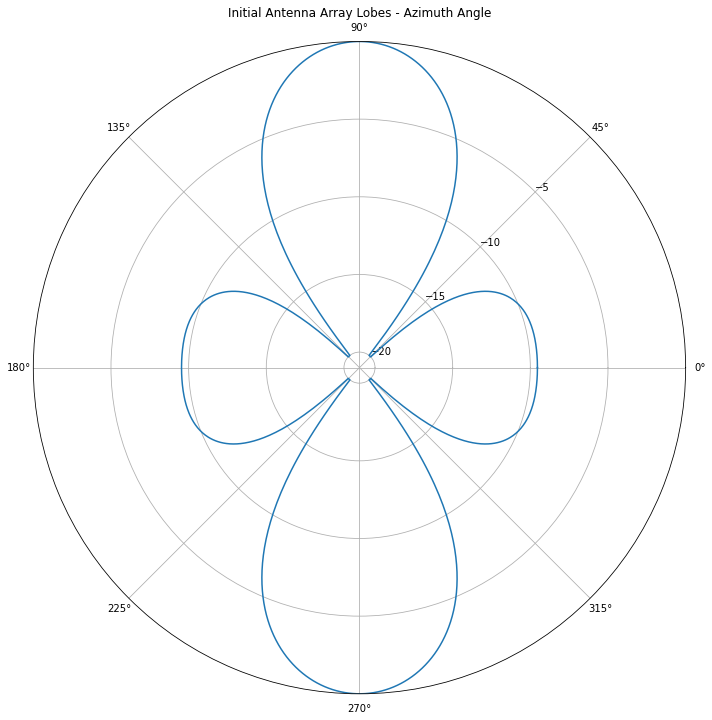

In [29]:
lam = 1 # wavelength
d = lam/2 # distance between each antenna

M = 10**3 # length of sim

N = 3 # number of antennas
theta = 45 # angle of signal arrival

w = np.ones(N) # initial weight for each antenna

phi, g = gain(d, w)
DdBi = gaini(g)

fig1 = plt.figure(1, figsize = [12, 12])
plt.polar(phi, DdBi)
ax = plt.gca()
ax.set_rticks([-20, -15, -10, -5])
ax.set_rlabel_position(45)
plt.title("Initial Antenna Array Lobes - Azimuth Angle")
plt.show()
fig1.savefig("init_ant_3.png")

### Calculating optimal weights
Using the LMS algorithm (an adjusted version of one I wrote as part of a digital filtering class), I can adaptively change the antenna weights for greater gain in the given direction and greater attenuation in all other directions. I am using N=3 here, so the results are not so impressive. This is done on purpose, as I use N=15 later, and the lobes are much more narrow.

signal power is:  1000.0
noise power is:  984.145564070059
SNR is:  1.0161098484906774


<ipython-input-37-90f1a6181bb9>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  y[n] = w@x1.T


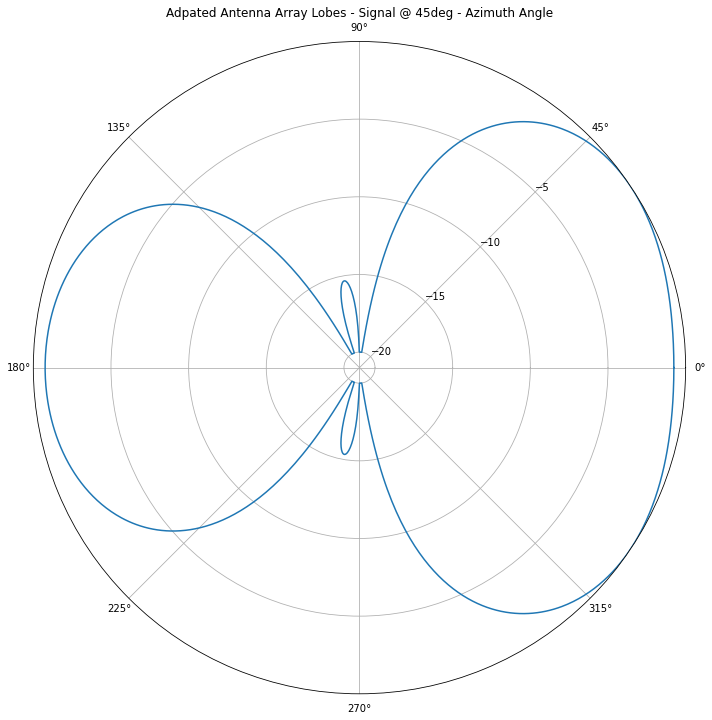

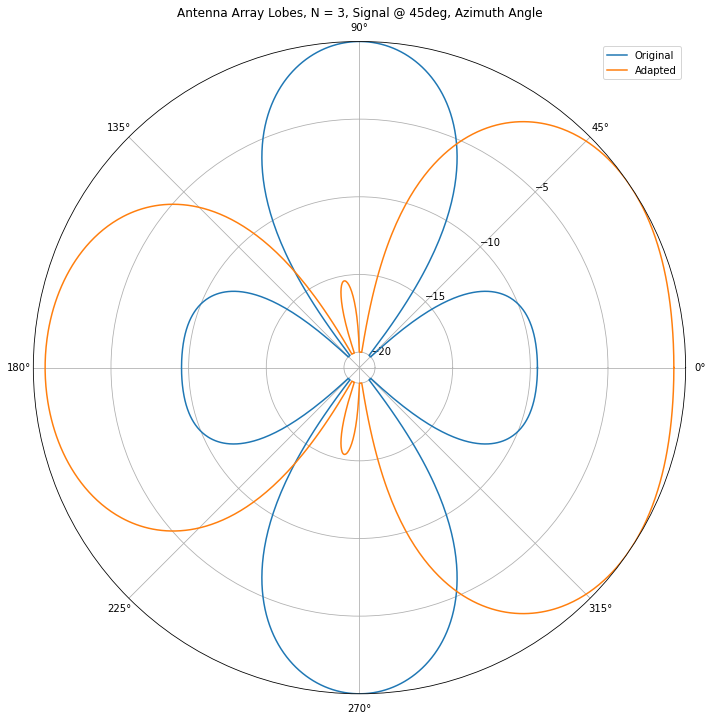

In [37]:
s = np.exp(np.arange(0, M) * 2j*np.pi*d*np.cos(np.deg2rad(theta))) # signal coming from side (desired)
nos = np.random.normal(0, 1, M) # AWGN
rec = s + nos

print("SNR is: ", str(np.sum(np.abs(s)**2)/np.sum(np.abs(nos)**2)))

y = np.zeros(M)
w = np.ones(N, dtype=np.complex_)
e = np.zeros(M, dtype=np.complex_)
delta = 0.01  
for n in range(N,M):
    # calculate output
    x1 = rec[n-N:n]
    x1 = x1[::-1]
    y[n] = w@x1.T
    # calculate error
    e[n] = s[n] - y[n]
    # update filter
    w = w + delta*e[n].conjugate()*x1

phi2, g = gain(d, w)
DdBi2 = gaini(g)

fig2 = plt.figure(1, figsize = [12, 12])
plt.polar(phi2, DdBi2)
ax = plt.gca()
ax.set_rticks([-20, -15, -10, -5])
ax.set_rlabel_position(45)
plt.title("Adpated Antenna Array Lobes - Signal @ 45deg - Azimuth Angle")
plt.show()
fig2.savefig("adap_ant_3.png")

fig3 = plt.figure(1, figsize = [12, 12])
plt.polar(phi, DdBi, label = 'Original')
plt.polar(phi2, DdBi2, label = 'Adapted')
ax = plt.gca()
ax.set_rticks([-20, -15, -10, -5])
ax.set_rlabel_position(45)
plt.title("Antenna Array Lobes, N = 3, Signal @ 45deg, Azimuth Angle")
plt.legend()
plt.show()
fig3.savefig("ant_3.png")

### Increasing the number of antennas in the array to improve lobes
By increasing the number of antennas in the array, I can narrow the lobes and more greatly attenuate the noise.

<ipython-input-21-e01139b987a4>:30: ComplexWarning: Casting complex values to real discards the imaginary part
  y[n] = w@x1.T


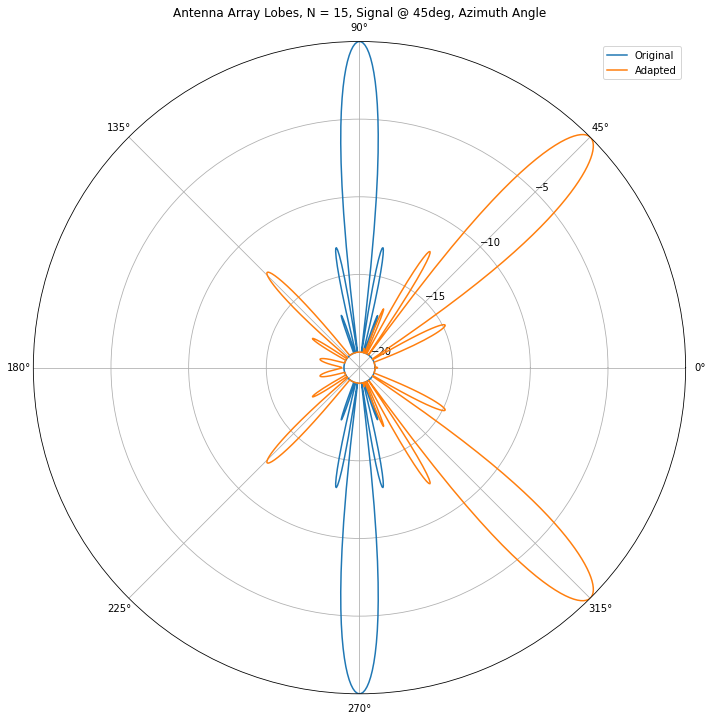

In [21]:
lam = 1 # wavelength
d = lam/2 # distance between each antenna
M = 10**3 # length of sim

N = 15 # number of antennas
theta = 45 # angle of signal arrival

w = np.ones(N) # initial weight for each antenna
phi, g = gain(d, w)
DdBi = gaini(g)
fig4 = plt.figure(1, figsize = [12, 12])
plt.polar(phi, DdBi, label = "Original")
ax = plt.gca()
ax.set_rticks([-20, -15, -10, -5])
ax.set_rlabel_position(45)

s = np.exp(np.arange(0, M) * 2j*np.pi*d*np.cos(np.deg2rad(theta))) # signal coming from side (desired)
nos = np.random.normal(0, 1, M) # AWGN

rec = s + nos

y = np.zeros(M)
w = np.ones(N, dtype=np.complex_)
e = np.zeros(M, dtype=np.complex_)
delta = 0.01
for n in range(N,M):
    # calculate output
    x1 = rec[n-N:n]
    x1 = x1[::-1]
    y[n] = w@x1.T
    # calculate error
    e[n] = s[n] - y[n]
    # update filter
    w = w + delta*e[n].conjugate()*x1

phi, g = gain(d, w)
DdBi = gaini(g)

plt.polar(phi, DdBi, label = "Adapted")
ax = plt.gca()
plt.legend()
plt.title("Antenna Array Lobes, N = 15, Signal @ 45deg, Azimuth Angle")
plt.show()
fig4.savefig("ant_15.png")

### Creating an animation to show the intermediate steps
A short animation showing how the antenna field is adapted over time. VERY SLOW, I would not recommend running this block unless you feel you should.

<ipython-input-27-7848fd0efe17>:22: ComplexWarning: Casting complex values to real discards the imaginary part
  y[n] = w@x1.T


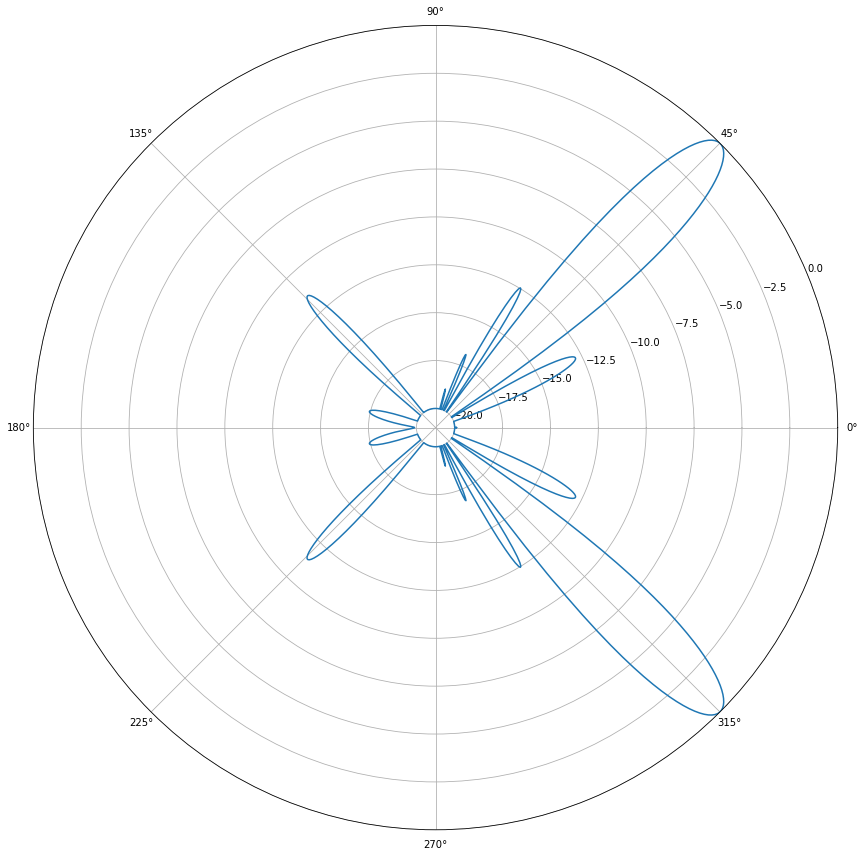

In [27]:
lam = 1 # wavelength
d = lam/2 # distance between each antenna
M = 5*10**2 # length of sim

N = 15 # number of antennas
theta = 45 # angle of signal arrival

s = np.exp(np.arange(0, M) * 2j*np.pi*d*np.cos(np.deg2rad(theta))) # signal coming from side (desired)
nos = np.random.normal(0, 1, M) # AWGN

rec = s + nos

y = np.zeros(M)
w = np.ones(N, dtype=np.complex_)
e = np.zeros(M, dtype=np.complex_)
DdBi = np.zeros((M, 1000))
delta = 0.01  
for n in range(N,M):
    # calculate output
    x1 = rec[n-N:n]
    x1 = x1[::-1]
    y[n] = w@x1.T
    # calculate error
    e[n] = s[n] - y[n]
    # update filter
    w = w + delta*e[n]*x1
    phi, g = gain(1/2, w)
    DdBi[n] = gaini(g)

fig5, ax = plt.subplots(1, figsize = [12,12], subplot_kw={'projection': 'polar'})

def animation_function(i):
    ax.clear()

    ax.plot(phi, DdBi[i+N])

# ax.plot(phi,DdBi[M-1])
# ax.set_rticks([-20, -15, -10, -5])
# ax.set_rlabel_position(45)
ax.set_title("Antenna Array Lobes, N = 15, Signal @ 45deg, Azumuth Angle")

animation = FuncAnimation(fig5, animation_function, frames=M-N-1, interval = 50)
vid = animation.to_html5_video()
html = display.HTML(vid)
display.display(html)
animation.save('filter.mp4', fps=20)
fig5.tight_layout()

### References

https://scipython.com/book2/chapter-7-matplotlib/examples/modelling-an-antenna-array/